In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import DistanceMetric

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [10]:
data = pd.read_csv("Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
# Separate features and target variable
X = data.drop(['animal name', 'type'], axis=1)
y = data['type']

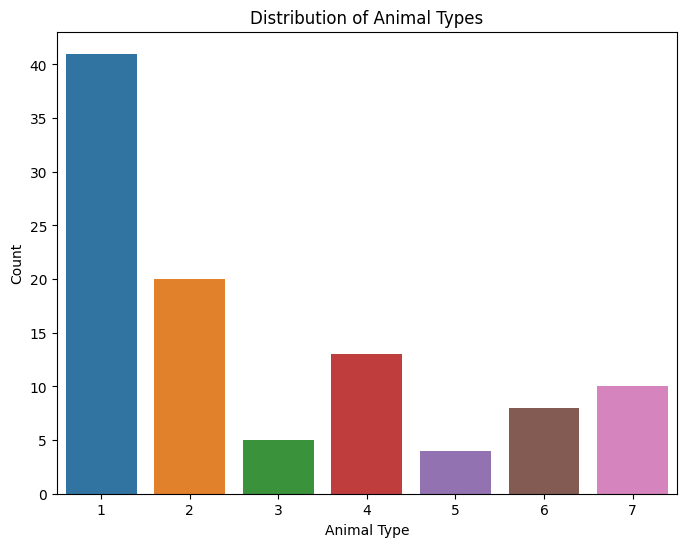

In [15]:
# Visualize the distribution of the target variable 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

<ipython-input-16-bb9cf7b20ac4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


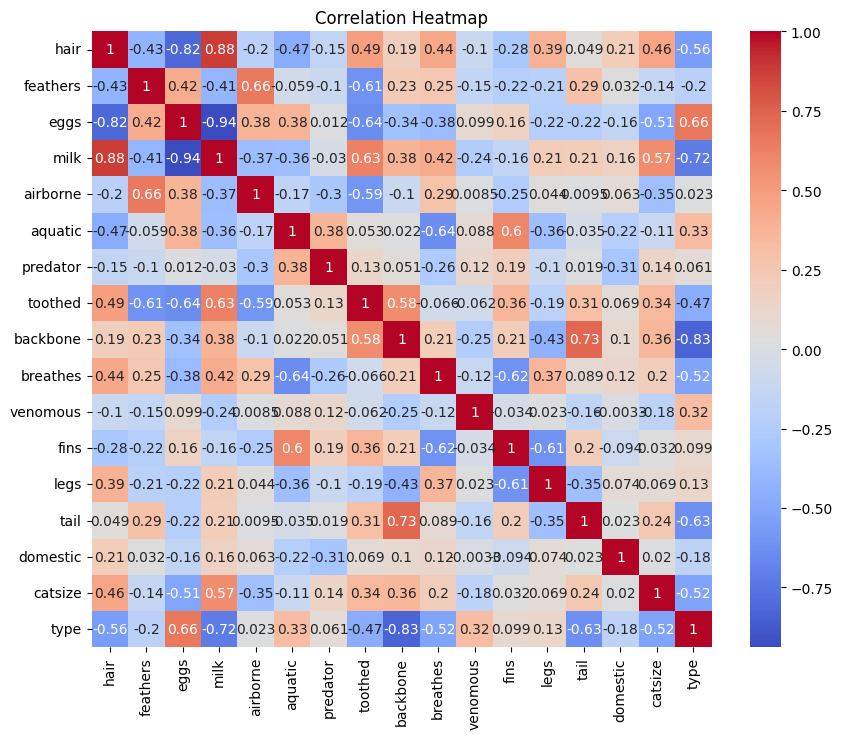

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Define a range of k values to try

k_values = range(1, 21)

best_accuracy = 0
best_k = 0

# Loop through different k values and evaluate the model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)







Best k: 3
Best Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

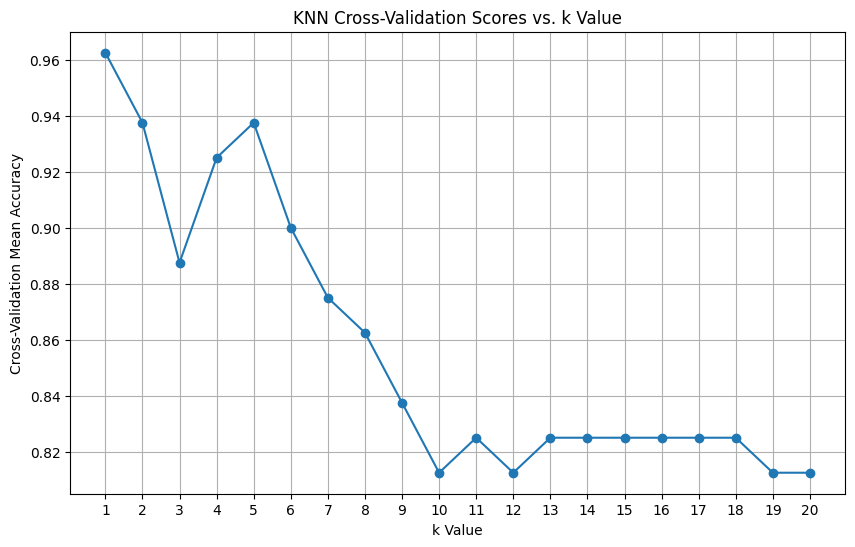

In [19]:
# Define a range of k values to test
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
k_values = np.arange(1, 21)

# Initialize lists to store mean cross-validation scores
cv_scores_mean = []

# Loop over k values and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores_mean.append(np.mean(cv_scores))

# Plot the graph of k values vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_mean, marker='o')
plt.title('KNN Cross-Validation Scores vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Cross-Validation Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()






In [21]:
# Define parameters for GridSearchCV
param_grid = {
    'n_neighbors': [3],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
param_grid

{'n_neighbors': [3],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan']}

In [22]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3],
                         'weights': ['uniform', 'distance']})

In [23]:
# Get the best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])
best_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [24]:
# Predict on test set
y_pred = best_knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3])

In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [26]:
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Reducing the computational expense using RandomizedSearchCv

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [ ]:
# Define parameters for RandomizedSearchCV
param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']})

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'weights': ['uniform', 'distance']})

In [ ]:
# Get the best parameters
best_params = random_search.best_params_
best_params

{'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}

In [ ]:
# Train the model with best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
# Predict on test set
y_pred = best_knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Best Parameters: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Test Accuracy: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


not a bad performance but it is preferable for large dataset where GridSearchCv takes longer to find the best parameter

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [29]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [30]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
# Separate features and target
X = data.drop('Type', axis=1)
y = data['Type']

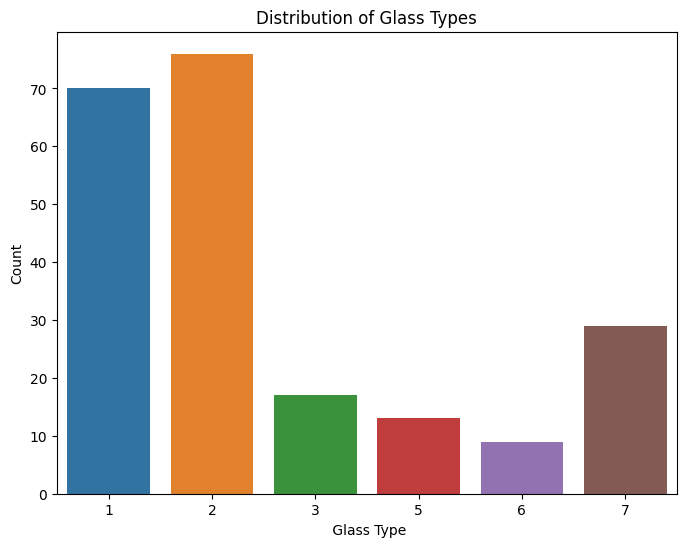

In [34]:
# Visualize the distribution of the target variable 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data)
plt.title('Distribution of Glass Types')
plt.xlabel(' Glass Type')
plt.ylabel('Count')
plt.show()

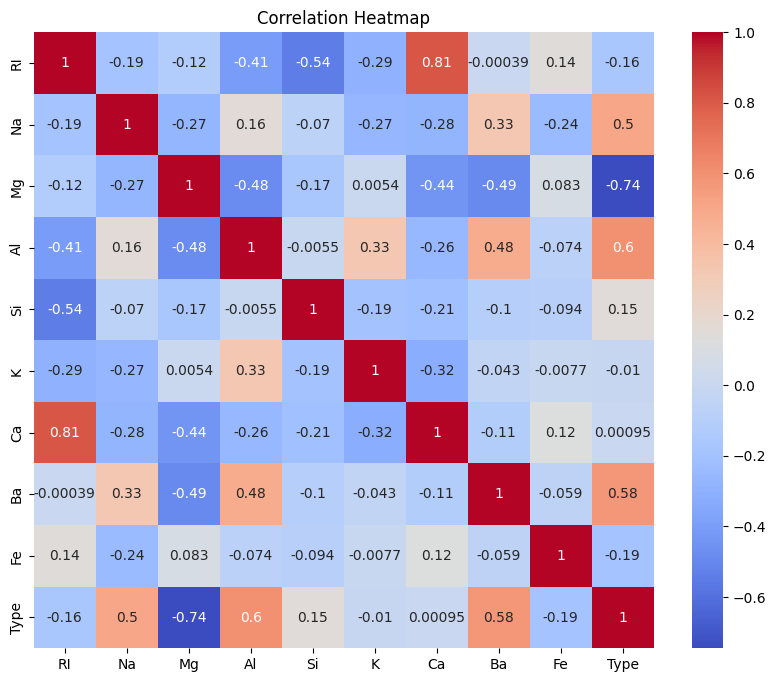

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define a range of k values to try

k_values = range(1, 21)

best_accuracy = 0
best_k = 0

# Loop through different k values and evaluate the model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)


Best k: 3
Best Accuracy: 0.813953488372093


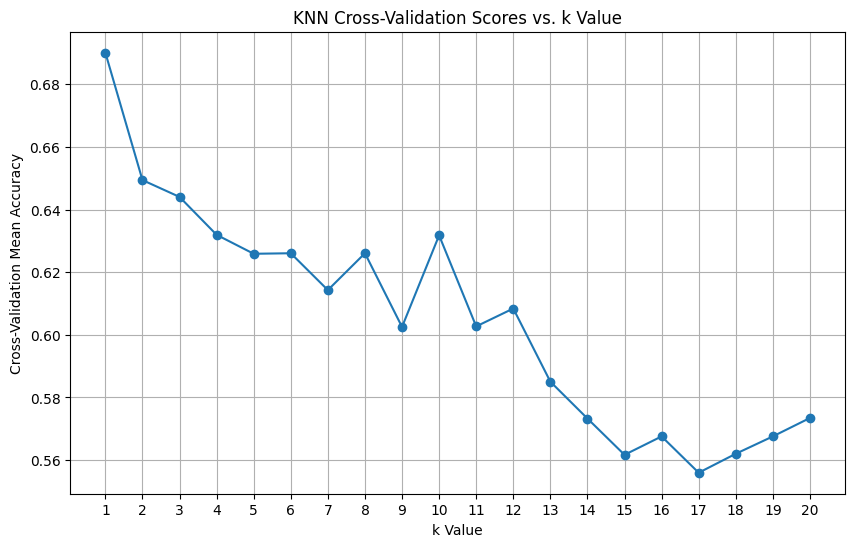

In [ ]:
# Define a range of k values to test
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline
k_values = np.arange(1, 21)

# Initialize lists to store mean cross-validation scores
cv_scores_mean = []

# Loop over k values and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores_mean.append(np.mean(cv_scores))

# Plot the graph of k values vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_mean, marker='o')
plt.title('KNN Cross-Validation Scores vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Cross-Validation Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Define parameters for GridSearchCV
param_grid = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
param_grid

{'n_neighbors': [3, 5, 7, 9, 11, 13],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan']}

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                metric=best_params['metric'])
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
# Predict on test set
y_pred = best_knn.predict(X_test_scaled)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 5, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 1, 1, 2, 1, 7, 3])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.7674418604651163

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.82      0.69        11
           2       0.75      0.64      0.69        14
           3       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.81      0.76      0.77        43
weighted avg       0.78      0.77      0.77        43



Reducing the computational expense using RandomizedSearchCv and randomforestclassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    scoring='accuracy',  # You can change the scoring metric
    cv=5,  # Cross-validation folds
    verbose=2,  # Higher value for more details
    n_jobs=-1
)

In [ ]:
# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)



Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best Score: 0.7430252100840337


In [ ]:
# Evaluate the best estimator on the test set
best_rf = random_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8372093023255814
